In [13]:
from encoding import Encoding
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

In [2]:
# Initial Model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
enc = Encoding(x_train, x_test)

loss_fn = tf.keras.losses.MeanSquaredError()
enc.set_loss_function(loss_fn)

enc.set_seed(36)

latent_dim = 4**2
enc.set_latent_dim(latent_dim)

enc.normalize_data()

enc.split_to_val(0.2)

enc.reshaper()

In [3]:
# Encoder

input_shape = (x_train.shape[1], x_train.shape[1], 1)
kernel_size = 3
filters = 32

enc.define_encoder(input_shape,filters,kernel_size)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │       100,368 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,688 (393.31 KB)

 Trainable params: 100,688 (393.31 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Decoder
enc.define_decoder(filters,kernel_size)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense (Dense)                                  │ (None, 6272)                        │             106,624 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape (Reshape)                              │ (None, 14, 14, 32)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose (Conv2DTranspose)             │ (None, 28, 28, 32)                  │               9,248 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose)           │ (None, 28, 28, 1)                   │                 289 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 116,161 (453.75 KB)

 Trainable params: 116,161 (453.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Define autoencoder
enc.define_autoencoder()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │       100,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       116,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,849 (847.07 KB)

 Trainable params: 216,849 (847.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.0483 - val_loss: 0.0147
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0141 - val_loss: 0.0128
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0125 - val_loss: 0.0120
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0108 - val_loss: 0.0109
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0104 - val_loss: 0.0105
loss 0.010351328179240227
val_loss 0.010538415051996708


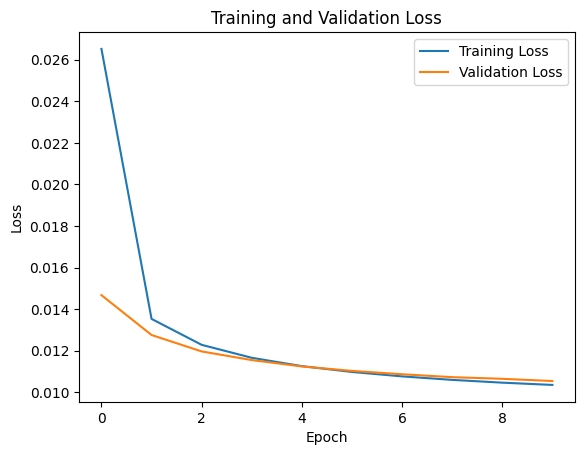

In [6]:
# Train model and plot

enc.compile_model('mse','adam')

enc.train_model(10, 64)

enc.plot_training_and_validation_curves()

In [ ]:
# Fine-tuning

# Define different hyperparameters to tune
batch_sizes_list = [32, 64, 128]
epochs_list = [10, 15, 20]
optimizers_list = ['adam', 'sgd']

enc.init_hyperparameter_tuning(batch_sizes_list,epochs_list,optimizers_list)

enc.tune_hyperparameters("fine-tuning_encoder.csv")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0110 - val_loss: 0.0111
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0108 - val_loss: 0.0110
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0106 - val_loss: 0.0108
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0100 - val_loss: 0.0103
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0098 - val_loss: 0.0101
Epoch 2/10
1500/1500

32


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │       100,368 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,688 (393.31 KB)

 Trainable params: 100,688 (393.31 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_1 (Dense)                                │ (None, 6272)                        │             106,624 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_1 (Reshape)                            │ (None, 14, 14, 32)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose)           │ (None, 28, 28, 32)                  │               9,248 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose)           │ (None, 28, 28, 1)                   │                 289 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 116,161 (453.75 KB)

 Trainable params: 116,161 (453.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │       100,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       116,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,849 (847.07 KB)

 Trainable params: 216,849 (847.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.1583 - val_loss: 0.1350
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.1319 - val_loss: 0.1277
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.1269 - val_loss: 0.1266
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.1261 - val_loss: 0.1263
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.1258 - val_loss: 0.1261
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.1256 - val_loss: 0.1259
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.1254 - val_loss: 0.1257
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.1252 - val_loss: 0.1255
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.1250 - val_loss: 0.1253
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.1248 - val_loss: 0.1251
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.1245 - val_loss: 0.1248
Epoch 12/20
375/375 ━━━━━━━━━━

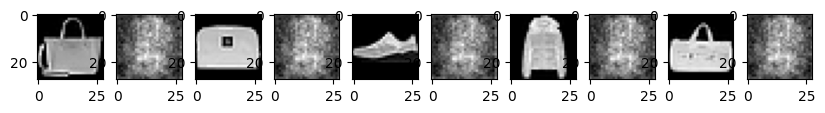

In [7]:
# Show samples of finetuned model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
enc_tuned = Encoding(x_train, x_test)

loss_fn = tf.keras.losses.MeanSquaredError()
enc_tuned.set_loss_function(loss_fn)

enc_tuned.set_seed(36)

latent_dim = 4**2
enc_tuned.set_latent_dim(latent_dim)

enc_tuned.normalize_data()

enc_tuned.split_to_val(0.2)

enc_tuned.reshaper()


input_shape = (x_train.shape[1], x_train.shape[1], 1)
kernel_size = 3
filters = 32
print(filters)

enc_tuned.define_encoder(input_shape,filters,kernel_size)
enc_tuned.define_decoder(filters,kernel_size)

enc_tuned.define_autoencoder()

enc_tuned.compile_model('mse','sgd')

enc_tuned.train_model(20, 128)

enc_tuned.show_val_plots()



32


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │       100,368 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,688 (393.31 KB)

 Trainable params: 100,688 (393.31 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_3 (Dense)                                │ (None, 6272)                        │             106,624 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_3 (Reshape)                            │ (None, 14, 14, 32)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose)           │ (None, 28, 28, 32)                  │               9,248 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose)           │ (None, 28, 28, 1)                   │                 289 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 116,161 (453.75 KB)

 Trainable params: 116,161 (453.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │       100,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       116,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,849 (847.07 KB)

 Trainable params: 216,849 (847.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0597 - val_loss: 0.0172
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0160 - val_loss: 0.0140
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0136 - val_loss: 0.0128
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0110 - val_loss: 0.0111
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0108 - val_loss: 0.0109
Epoch 12/20
375/375 ━━━━━━━━━━

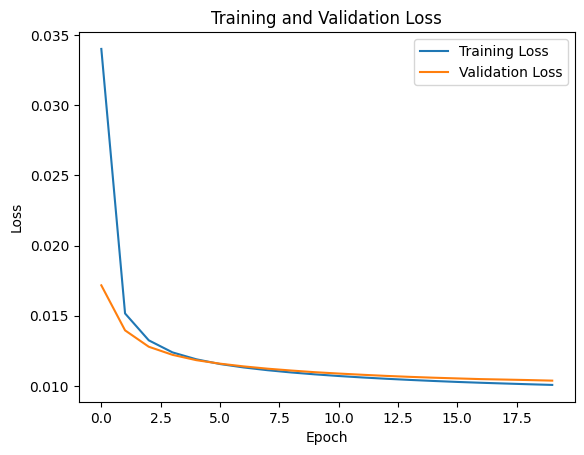

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


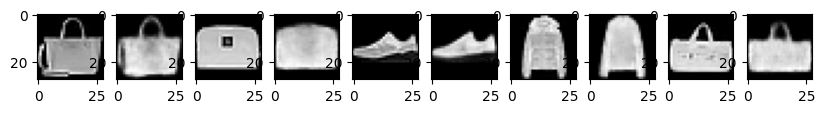

28


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5488)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │        87,824 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,104 (344.16 KB)

 Trainable params: 88,104 (344.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_4 (Dense)                                │ (None, 5488)                        │              93,296 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_4 (Reshape)                            │ (None, 14, 14, 28)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose)           │ (None, 28, 28, 28)                  │               7,084 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose)           │ (None, 28, 28, 1)                   │                 253 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 100,633 (393.10 KB)

 Trainable params: 100,633 (393.10 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        88,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       100,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,737 (737.25 KB)

 Trainable params: 188,737 (737.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0640 - val_loss: 0.0173
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0161 - val_loss: 0.0140
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0136 - val_loss: 0.0128
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0108 - val_loss: 0.0109
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0107 - val_loss: 0.0108
Epoch 12/20
375/375 ━━━━━━━━━━

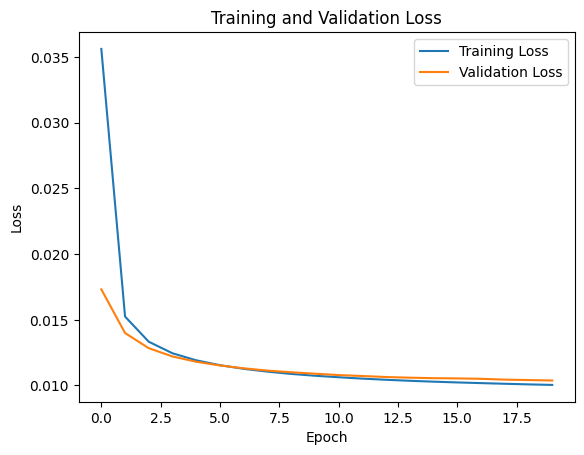

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


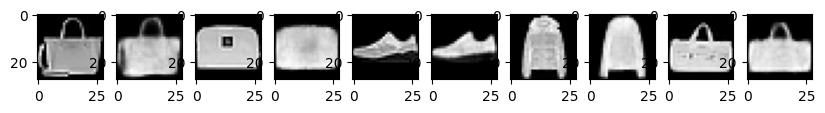

24


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 24)     │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │        75,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,520 (295.00 KB)

 Trainable params: 75,520 (295.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_5 (Dense)                                │ (None, 4704)                        │              79,968 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_5 (Reshape)                            │ (None, 14, 14, 24)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_10 (Conv2DTranspose)          │ (None, 28, 28, 24)                  │               5,208 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_11 (Conv2DTranspose)          │ (None, 28, 28, 1)                   │                 217 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 85,393 (333.57 KB)

 Trainable params: 85,393 (333.57 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        75,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        85,393 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,913 (628.57 KB)

 Trainable params: 160,913 (628.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0666 - val_loss: 0.0184
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0170 - val_loss: 0.0146
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0142 - val_loss: 0.0133
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0131 - val_loss: 0.0126
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━

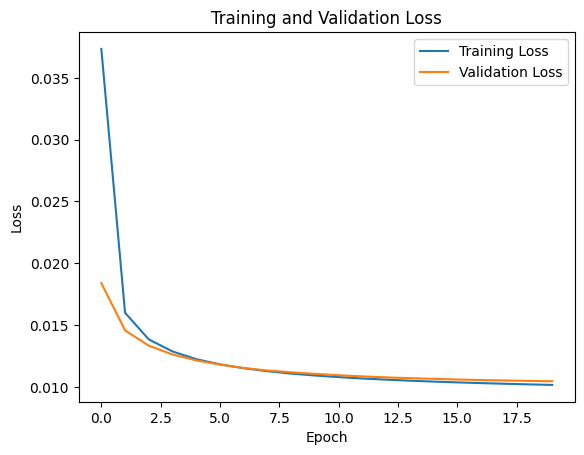

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


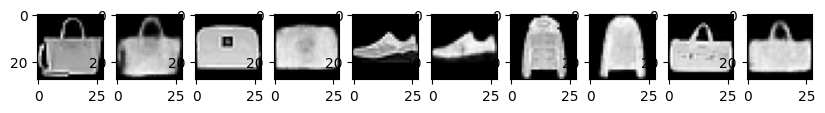

20


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │        62,736 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,936 (245.84 KB)

 Trainable params: 62,936 (245.84 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_6 (Dense)                                │ (None, 3920)                        │              66,640 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_6 (Reshape)                            │ (None, 14, 14, 20)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_12 (Conv2DTranspose)          │ (None, 28, 28, 20)                  │               3,620 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_13 (Conv2DTranspose)          │ (None, 28, 28, 1)                   │                 181 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 70,441 (275.16 KB)

 Trainable params: 70,441 (275.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        62,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        70,441 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,377 (521.00 KB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0659 - val_loss: 0.0187
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0173 - val_loss: 0.0150
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0146 - val_loss: 0.0137
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0135 - val_loss: 0.0130
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0128 - val_loss: 0.0125
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━

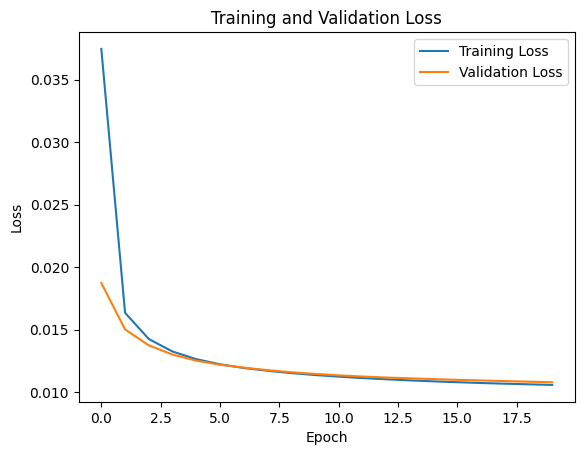

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


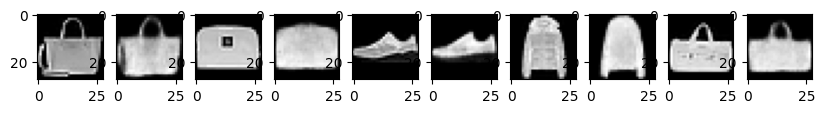

16


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │        50,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,352 (196.69 KB)

 Trainable params: 50,352 (196.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_7 (Dense)                                │ (None, 3136)                        │              53,312 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_7 (Reshape)                            │ (None, 14, 14, 16)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_14 (Conv2DTranspose)          │ (None, 28, 28, 16)                  │               2,320 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_15 (Conv2DTranspose)          │ (None, 28, 28, 1)                   │                 145 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 55,777 (217.88 KB)

 Trainable params: 55,777 (217.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        50,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        55,777 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,129 (414.57 KB)

 Trainable params: 106,129 (414.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0691 - val_loss: 0.0189
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0177 - val_loss: 0.0154
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0131 - val_loss: 0.0128
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0126 - val_loss: 0.0124
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━

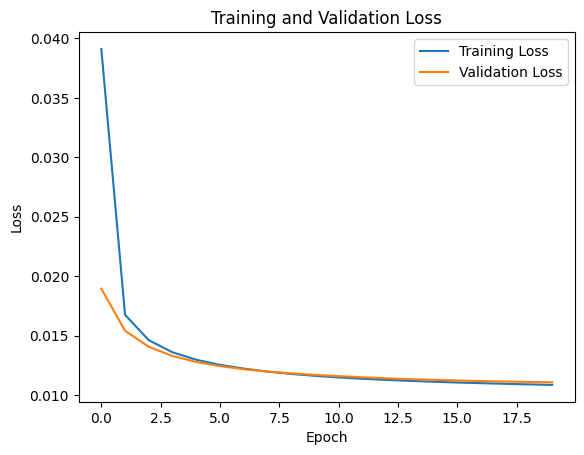

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


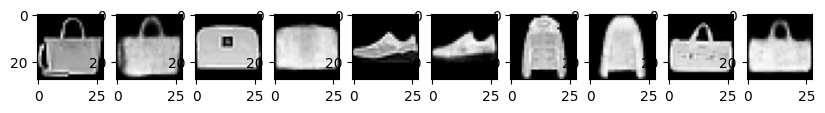

In [9]:
# Decreasing filter size

filter_size_values = [32,28,24,20,16]

for f_size in filter_size_values:

    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    enc_tuned = Encoding(x_train, x_test)

    loss_fn = tf.keras.losses.MeanSquaredError()
    enc_tuned.set_loss_function(loss_fn)

    enc_tuned.set_seed(36)

    latent_dim = 4**2
    enc_tuned.set_latent_dim(latent_dim)

    enc_tuned.normalize_data()

    enc_tuned.split_to_val(0.2)

    enc_tuned.reshaper()


    input_shape = (x_train.shape[1], x_train.shape[1], 1)
    kernel_size = 3
    filters = f_size
    print(filters)

    enc_tuned.define_encoder(input_shape,filters,kernel_size)
    enc_tuned.define_decoder(filters,kernel_size)

    enc_tuned.define_autoencoder()

    enc_tuned.compile_model('mse','adam')

    enc_tuned.train_model(20, 128)

    enc_tuned.plot_training_and_validation_curves()
    enc_tuned.show_val_plots()


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


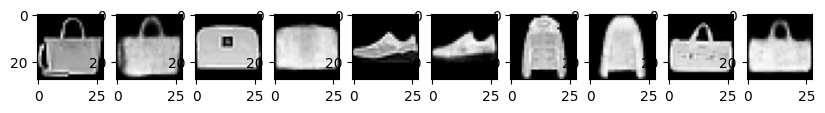

In [10]:

enc_tuned.show_val_plots()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 16)             │        62,736 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,936 (245.84 KB)

 Trainable params: 62,936 (245.84 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)                     │ (None, 16)                          │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_8 (Dense)                                │ (None, 3920)                        │              66,640 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_8 (Reshape)                            │ (None, 14, 14, 20)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_16 (Conv2DTranspose)          │ (None, 28, 28, 20)                  │               3,620 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv2d_transpose_17 (Conv2DTranspose)          │ (None, 28, 28, 1)                   │                 181 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ decoder_output (Activation)                    │ (None, 28, 28, 1)                   │                   0 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 70,441 (275.16 KB)

 Trainable params: 70,441 (275.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        62,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        70,441 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,377 (521.00 KB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0601
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0160
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0139
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0129
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0123
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0120
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0117
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0115
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0113
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0112
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0110
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0109
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0109
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0108
Epoch 15/20
469/469 ━━━━━━━━━━━

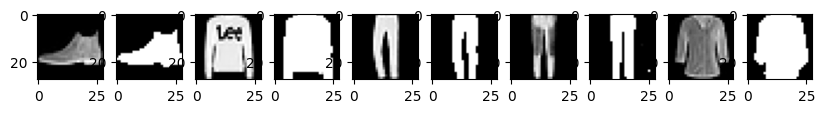

In [11]:
# Final model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
enc_final = Encoding(x_train, x_test)

loss_fn = tf.keras.losses.MeanSquaredError()
enc_final.set_loss_function(loss_fn)

enc_final.set_seed(36)

latent_dim = 4**2
enc_final.set_latent_dim(latent_dim)

enc_final.normalize_data()

enc_final.reshaper()


input_shape = (x_train.shape[1], x_train.shape[1], 1)
kernel_size = 3
filters = 20

enc_final.define_encoder(input_shape,filters,kernel_size)
enc_final.define_decoder(filters,kernel_size)

enc_final.define_autoencoder()

enc_final.compile_model('mse','adam')

enc_final.train_model_no_val(20, 128)


enc_final.evaluate_model()
enc_final.save_model('final_autoencoder_weights.weights.h5')
enc_final.save_encoder_and_dump_to_yaml('encoder.weights.h5','encoder.yaml')
enc_final.dump_to_yaml('final_autoencoder_config.yaml')

# enc_final.show_val_plots()
enc_final.show_test_plots()